# Exercise 5

Group Members: Luis Pazos Clemens, Robert Freund, Eugen Dizer

Deadline: 26.01.2021, 16:00.

In [37]:
#Load standard libraries
import numpy as np   
import matplotlib.pyplot as plt  
from scipy.sparse import coo_matrix
from scipy.sparse import csc_matrix
from scipy.sparse import linalg

# 3. Constructing the X matrix

In [38]:
def construct_X(M,alphas,Np):
    
    '''
        M: integer; number of the pixels in one direction
        alphas: np.array of the angles
        Np: integer; number of pixels of the detector
    '''
    
    alphas = alphas*2*np.pi/360 #translation from grad into rad
    N0 = len(alphas) #number of angles
    #produce meshgrid
    c = np.mgrid[-M/2+0.5:M/2,-M/2+0.5:M/2]
    c[:] = -c[0],c[1] # numeration of the pixels starting from top left (0th pixel at top left)
    C1 = np.reshape(c,(2,M**2)) #get x and y coordinate of each pixel
    #several meshgrids for different angles
    C = np.zeros((N0,2,M**2))
    C[:] = C1
    
    #normal vector n and distance s0 between middle of sensor and position of 0th sensor
    n = np.array([np.sin(alphas),np.cos(alphas)])
    s0 = np.sqrt(2)*(M/2-0.5)
    
    #position where beam through this pixel hits the sensor for different angels
    p = np.multiply(C[:,0,:].T,n[0]).T+np.multiply(C[:,1,:].T,n[1]).T+s0
    
    #step between the sensors
    step = 2*s0/(Np-1)
    
    #divide the position into the sensor districts
    detect = p/step
    
    # which detector is the lower/upper one hit by the beam
    detect_indices_low = detect-detect%1
    detect_indices_up = detect_indices_low + 1
    #write into one array
    detect_indices = np.concatenate((detect_indices_low,detect_indices_up),axis=1)
    
    #calculate the index i with different angles (index i0)
    for i0 in range(N0):
        detect_indices[i0,:] = detect_indices[i0,:] + Np*i0
    
    #calulate the weight for each pixel and put them into the data array
    weight_2 = detect%1
    weight_1 = 1-detect%1
    data = np.concatenate((weight_1,weight_2),axis=1).flatten()
    
    #define indices i and j only where the weight is larger than zero
    i_indices = detect_indices.flatten()[data!=0]
    
    #define j_indices with the corresponding structure we used above for the
    # weight (called data) and the i_indices
    j_indices = np.zeros((N0,2,M**2))
    j_indices[:,:] = np.arange(M**2)
    j_indices = j_indices.flatten()[data!=0]
    
    #restrict data to data!=0
    data = data[data!=0]
    
    X = coo_matrix((data, (i_indices, j_indices)), shape=(Np*N0,M**2))
    return X

## 3.1 Calculating the Exampe matrix and compare with given Data

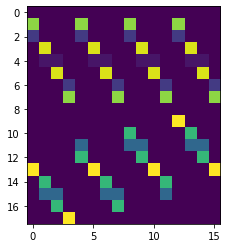

In [3]:
#print some test matrices for debugging

X_test1 = construct_X(4,np.array([0,45]),9)
plt.imshow(X_test1.toarray())

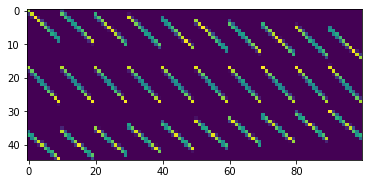

In [4]:
#print example in sheet

X_test=construct_X(10,np.array([-33,1,42]),15)
plt.imshow(X_test.toarray())

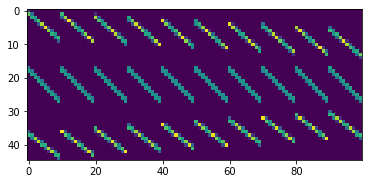

In [5]:
#load example and compare

X_ex=np.load('hs_tomography/X_example.npy')
plt.imshow(X_ex)

# 4. Recovering the Image
## 4.1 Smaller Image (M=77)

In [6]:
#load M=77 data

alphas_77=np.load('hs_tomography/alphas_77.npy')
y_77 = np.load('hs_tomography/y_77.npy')
X_77_test = np.load('hs_tomography/X_77.npy',allow_pickle=True)

In [7]:
#construct X matrix for M=77, Np = 109, alphas = alphas_77

X_77=construct_X(77,np.array(alphas_77),109)
X_77 = X_77.tocsc()

In [29]:
#calculate image

#for high tolerance it looks good but if you lower the tolerance the
#the image disappears in a star shaped structure
#I think we should use tol = 10**(-8)

tol = 10**(-3)
beta_77 = linalg.lsqr(X_77,y_77,atol = tol,  btol=tol)

In [30]:
# bring beta in the right shape for an image

beta_77_matrix = np.reshape(beta_77[0],(77,77))

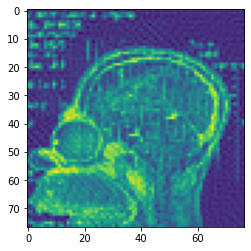

In [31]:
#print M=77 picture
plt.imshow(beta_77_matrix)

In [554]:
#calculate image from the data given by the tutors
beta_77 = linalg.lsqr(X_77_test,y_77)

ValueError: dimension mismatch

## 4.2 Larger Image (M=195)

In [32]:
#load M=195 data

alphas_195=np.load('hs_tomography/alphas_195.npy')
y_195 = np.load('hs_tomography/y_195.npy')

In [33]:
#construct X matrix for M=195, Np = 275, alphas = alphas_195

X_195=construct_X(195,np.array(alphas_195),275)
X_195 = X_195.tocsc()

In [34]:
#calculate image

#for high tolerance it looks good but if you lower the tolerance the
#the image disappears in a star shaped structure
#I think we should use tol = 10**(-8)

beta_195 = linalg.lsqr(X_195,y_195,atol = tol, btol=tol)

In [35]:
# bring beta in the right shape for an image

beta_195_matrix = np.reshape(beta_195[0],(195,195))

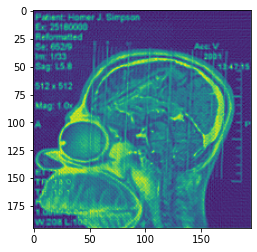

In [41]:
#print M=195 picture

plt.imshow(beta_195_matrix)